<a href="https://colab.research.google.com/github/Son-Of-Fry/ProyectoIntegrador/blob/main/Avance3_64Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 3: Baseline

Por José Ricardo Munguía Marín


#**Galu Guard — Fase3: YOLO + Qt + Reportes**


Después de una correción en cuanto que considerar entregables reales al proyecto sobre lo que pide la rúbrica, se presenta el avance real del proyecto, la base ya avanzada de un sistema de visión, personalisable y abierto a mejoras continuas así como especialización de los casos.






#### Objetivo

Desarrollar una aplicación avanzada de visión computacional en tiempo real para vigilancia y análisis, basada en detección de objetos usando **YOLO**, con:

* **Interfaz gráfica (PySide6 / Qt)**
* **Soporte multi-cámara**
* **Integración con modelos personalizados**
* **Reportes automáticos (CSV + imágenes)**
* **Configuración modular**



#### **Primera versión (`camera_yolo.py`)**
Durante las primeras dos semanas, además de lo entregable en la rúbrica, se fue empezando el prototipo inicial de un archivo ejecutable QT que cargara un modelo simple y mostrara las cámaras disponibles. las principales herramientas fueron:


* `PySide6` para UI.
* `YOLOv8` (Ultralytics).
* Soporte para selección de cámara.
* Controles de confianza, resolución y FPS.
* Detección de objetos y visualización en tiempo real.

**Limitaciones iniciales:**

* Solo soportaba una cámara.
* No guardaba resultados.
* No había configuración dinámica.
* Solo se usaba un modelo fijo (`yolo11s.pt`).





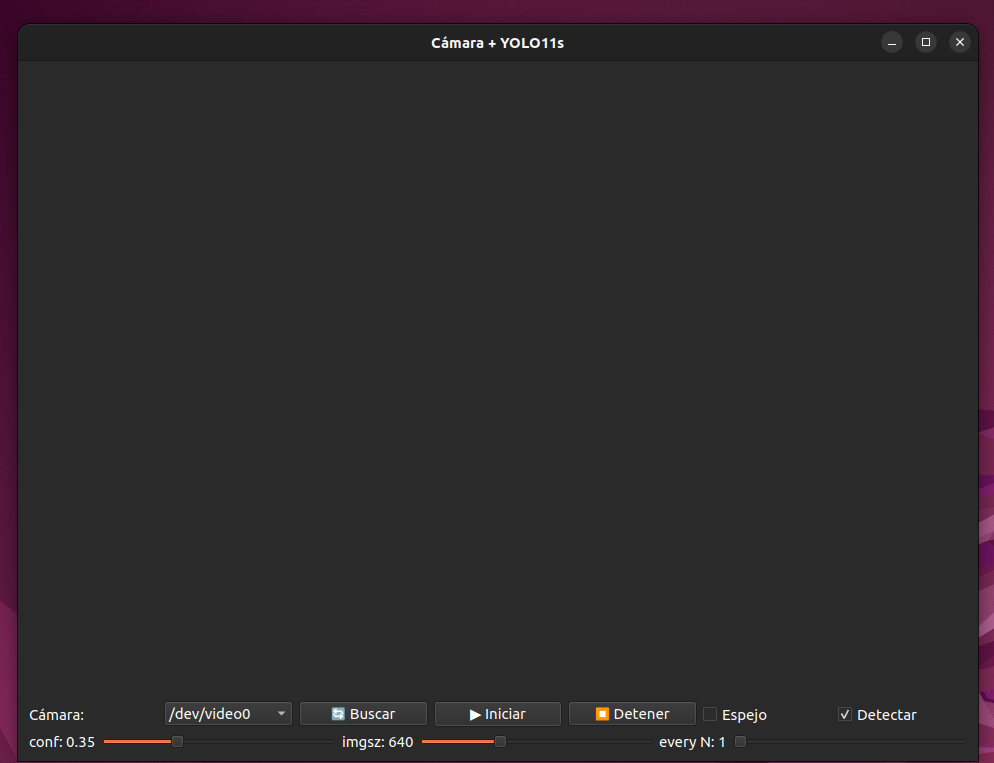

#### **Estructura del proyecto (código MLOps)**
Basado en las buenas prácticas de MLOps, se tiene que tener un buen orden de las carpetas y archivos. resaltando nombres faciles de reconocer.

```
galu_guard/
├── camera_yolo_1.py              # Ejecutor para 1 cámara
├── camera_yolo_1x2.py            # Ejecutor para 2 cámaras (disposición horizontal)
├── camera_yolo_2x2.py            # Ejecutor para hasta 4 cámaras (grid)
├── camera_yolo_helmet.py         # Ejecutor especializado para casco (modelo fine-tuneado)
├── configurator.py               # Interfaz para seleccionar modelo, cámaras y clases
├── launcher.py                   # Iniciador principal (UI con 3 botones)
├── deduplicator.py               # Postprocesador de duplicados en CSV
├── config.json                   # Archivo de configuración generado por configurator
├── trainer.py                    # Placeholder para futura interfaz de entrenamiento
│
├── models/                       # Modelos YOLO personalizados y por defecto
│   ├── yolo11s.pt                # Modelo base
│   └── helmet.pt                 # Modelo entrenado para cascos EPP
│
├── logs/                         # Salidas del sistema en tiempo real
│   ├── detections.csv            # Log de detecciones brutas
│   ├── detections_deduped.csv   # Log deduplicado
│   └── images/                   # Recortes individuales de detecciones
│       └── cam0_20251012_helmet.jpg
│
├── data/                         # Datos para entrenamiento (opcional)
│   ├── images/                   # Imágenes de entrenamiento
│   └── labels/                   # Etiquetas YOLO formato txt
│
└── runs/                         # Carpeta generada por Ultralytics YOLO al entrenar
    └── detect/
        └── train2/
            └── weights/
                └── best.pt       # Modelo fine-tuneado
```




Aquí creamos una arquitectura modular con:

* `launcher.py`: iniciador principal con 3 botones:

  * **Entrenamiento**
  * **Configuración**
  * **Ejecutar**


* `configurator.py`: interfaz Qt para elegir:

  * Cámaras disponibles.
  * Clases a detectar.
  * Parámetros de inferencia (confianza, resolución, cada N frames).
  * Se guarda todo en `config.json`.

* El `config.json` incluye:

* Lista de cámaras.
* Clases seleccionadas.
* Modelo YOLO personalizado.
* Parámetros.


Pero un punto clave es la elección de cuantas cámaras se van a estar monitoreando. Un robot inicialmente tiene una frontal, pero exite la posibilidad de que se añadan nuevas o incluso ver dos robots distintos. Por lo que, por simplicidad, se crearon diferentes tipos de visualizadores.

* Script ejecutor según número de cámaras:

  * `camera_yolo_1.py`
  * `camera_yolo_1x2.py`
  * `camera_yolo_2x2.py`

En construcción el resto de archivos.




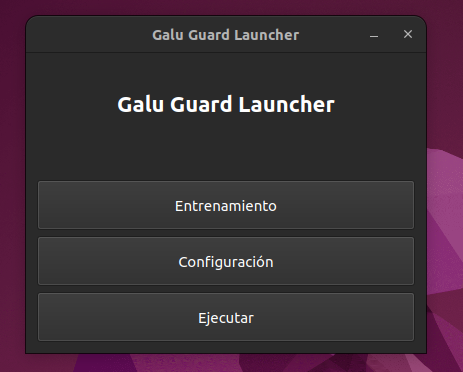

**Galu Guard Launcher**

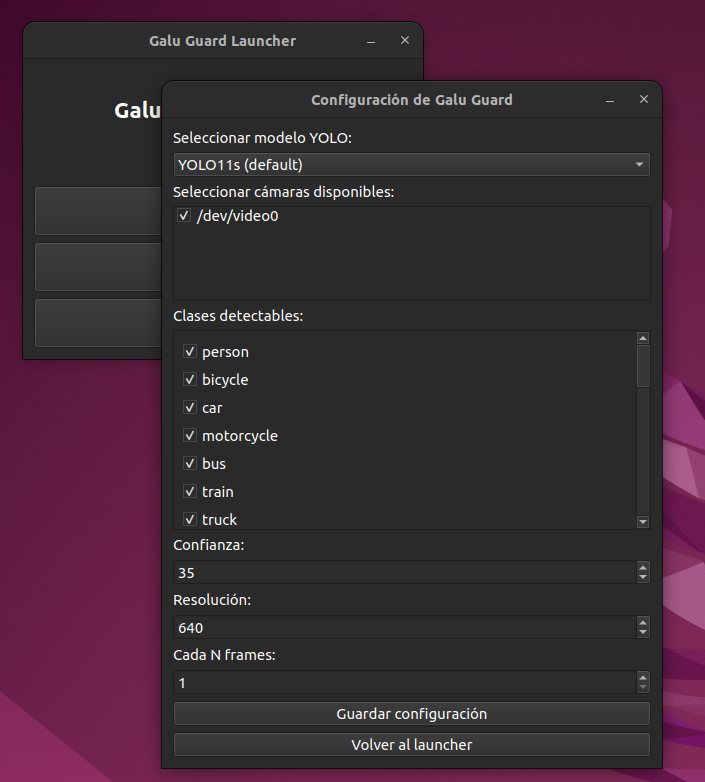

**Galu Guard Configuración**


#### **Reporte automático**
como un primer avance, se mejoro el ejecutor (scripts anteriores), para que genere un primer reporte, el cual va a servir como fuente de datos para generar reportes.

* Guardar detecciones en un **CSV**: `logs/detections.csv`
* Guardar **recortes de imágenes**: `logs/images/*.jpg`

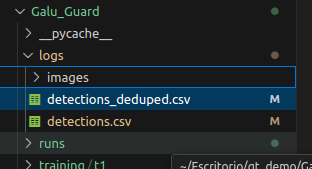

#### **Implementamos deduplicador**
En está etapa de pruebas, donde las ligeras variaciones puede generar duplicados, se creó un deduplicador para evitar entradas repetidas, aplicando distinos filtros, como:

* Compara bounding boxes entre frames recientes.
* Usa:

  * Coincidencia por clase.
  * Distancia entre centros (`IoU` simplificado).
  * Tamaño similar de caja.
  * Ventana de tiempo (ej. 2 segundos).
* Resultado limpio en: `detections_deduped.csv`





#### **Añadimos soporte para modelos fine-tuneados**
Una parte importante de este proyecto, es el crear nuevos modelos de visión, adaptados a las necesidades que vayan surgiendo de una manera simple. Por lo que la idea es añadir un flujo sencillo usando herramientas "graphical image annotation".

La intención es que el launcher rediriga a una versión open source que cargue las imágenes, se seleccione nuevas clases, y se realicen entrenamientos o Ajustes-finos con yolo.


Una herramienta de estas usada localmente es LabelIMg, pero dejo de recibir soporte y no es compatible con versiones de Qt recientes.


Por ahora, se uso roboflow.com, para probar crear datasets etiquetados nuevos y/o acceder a una gran cantidad datos abiertos.


Creamos archivo especializado:
Para esta fase de pruebas, creamos un modelo de detección de EPP con imágenes ofrecidas por el sitio (Bajo licencia MIT, https://www.rf100.org/ ). No es un modelo final creado, pero sí


* Detecta exclusivamente `"helmet"` (EPP).
* Totalmente compatible con el resto del sistema (CSV, imágenes, deduplicador, configuración).



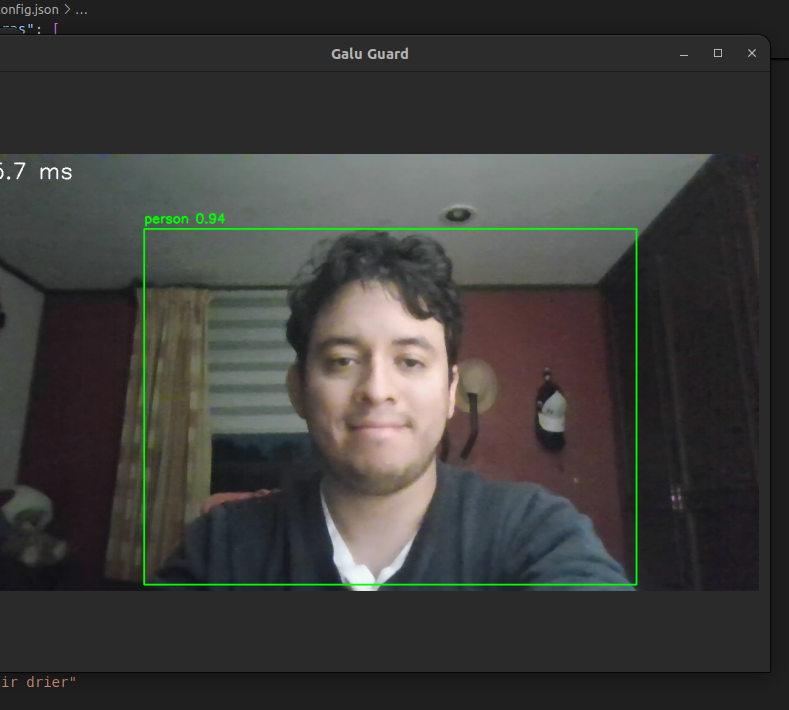

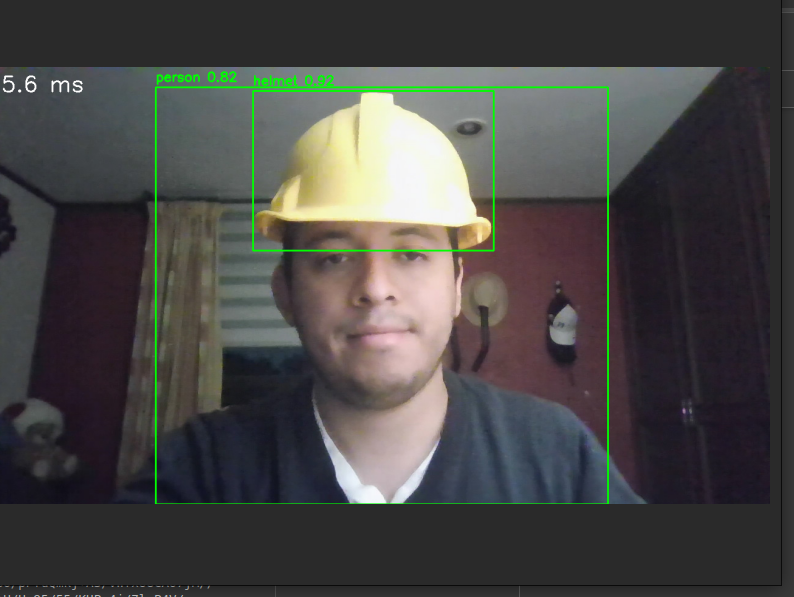

#### **Configuración dinámica del modelo**

Actualizamos `configurator.py` para:

* Seleccionar modelo entre varios (`helmet.pt`, `yolo11s.pt`, o uno personalizado).
* Al cambiar modelo, **se actualizan las clases disponibles automáticamente**.
* Las clases seleccionadas se filtran (por nombre) y se guardan en `config.json`. Esto permite cargar el script correspondiente al modelo.


### **Estado actual del sistema Galu Guard**

* ✅ Interfaz gráfica inicial.
* ✅ Configurable: Multi-modelo y multi-cámara.
* ✅ Bases para reportes automáticos (CSV + imágenes).
* ✅ Desduplicación.
* ✅ Flujo desde un launcher.
* ✅ Compatible con detección genérica y modelos entrenados personalizados.


### Próximos pasos

1. Incluir el sistema de entrenamiento, intentando añadir una herramienta "annotation".
2. Añadir visualización de estadísticas y gráficos desde el CSV, o exportar a un Dashboard.
3. Exportar reportes (si no se migra a dashboard).
4. Soporte para cámaras IP (RTSP).
5. Integrar con la patrulla de los Go2 (LiDAR) ya existente.
6. Mejorar la interfaz (ejecutable, simplificado, notas)
7. Intentar una migración a un entorno web.
8. Intentar empaquetar en contenedores.

Estás dos últimas parecieran más complejas, pues docker en sí no tiene interfaz visual y un entorno web pudiera tener dificultades con la transmición.

Notas:

- Se añadiran todas las fuentes y recursos que se han usado al momento de empaquetar el proyecto.
- El proyecto se subirá a github de manera pública. Al finalizar la materia se volverá privado por acuerdos de confidencialidad y propiedad intelectual.
- se utiliza Conda.
- Por el peso de losm odelso e imágenes, no se subirá todo al github.